In [27]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import os
import matplotlib.pyplot as plt

In [17]:
symbol = 'ES=F'
f = open("ALPHA_KEY", 'r')
key = f.readline()
f.close()
# AlphaVantage에서 데이터를 받아온다.
ts  = TimeSeries(key=key, output_format='pandas')
tmp, meta_tmp = ts.get_intraday(symbol=symbol,interval='1min', outputsize='full')
tmp.index = pd.to_datetime(tmp.index)

In [18]:
display(tmp.head())
display(tmp.tail())

,1. open,2. high,4. close,5. volume,3. low
date,,,,,
2019-06-27 00:00:00,2927.5,2927.5,2927.5,0.0,2927.5
2019-06-27 00:01:00,2927.5,2927.5,2927.5,125.0,2927.5
2019-06-27 00:02:00,2927.5,2927.5,2927.5,79.0,2927.5
2019-06-27 00:03:00,2927.5,2927.5,2927.5,84.0,2927.5
2019-06-27 00:04:00,2927.5,2927.5,2927.5,89.0,2927.5


,1. open,2. high,4. close,5. volume,3. low
date,,,,,
2019-07-02 03:56:00,2965.75,2966.00,2965.75,161.0,2965.50
2019-07-02 03:57:00,2965.75,2965.75,2965.25,408.0,2965.00
2019-07-02 03:58:00,2965.00,2965.25,2965.25,434.0,2965.00
2019-07-02 03:59:00,2965.25,2965.50,2965.25,226.0,2965.25
2019-07-02 04:00:00,2965.25,2965.50,2965.25,477.0,2965.00


In [19]:
data = tmp.copy()

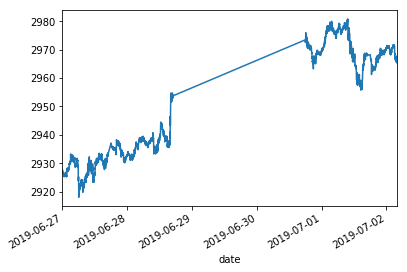

In [41]:
data['4. close'].plot()

### Every 1,000 Volume

3660


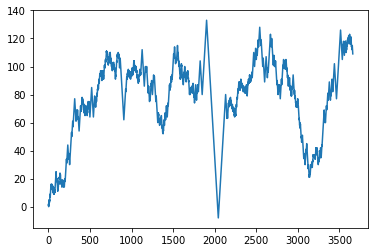

In [45]:
threshold = 1000

num_volume=0
num_buy = 0
c_tick = 0 # current tick counter
prev_p =0
cur_p =0
d_P_t =0
b_t=[1]

for i in data.index:
        c_tick += data.loc[i]['5. volume']
        if(c_tick > size_tick):
            prev_p = cur_p
            cur_p = data.loc[i]['4. close']
            d_p = cur_p - prev_p
            if d_p != 0:
                b_t.append(abs(d_p)/d_p )
            else :
                b_t.append(b_t[-1])
            if(b_t[-1]==1):
                num_buy+=1
            
            num_tick+=1
            c_tick -=threshold;
            ## c_volume >= 2*threshold 예외 
            while(c_tick > threshold):
                num_tick+=1
                b_t.append(b_t[-1])
                c_tick -=threshold;
sum_b = 0            
e_t = []
for i in b_t : 
    sum_b += i
    e_t.append(sum_b)    
print(num_tick)
display(plt.plot(e_t))



### Dollar Bars

In [ ]:
threshold_dollar = 1000

num_volume=0
num_buy = 0
c_tick = 0 # current tick counter
prev_p =0
cur_p =0
d_P_t =0
b_t=[1]

for i in data.index:
        c_tick += data.loc[i]['5. volume']
        if(c_tick > size_tick):
            prev_p = cur_p
            cur_p = data.loc[i]['4. close']
            d_p = cur_p - prev_p
            if d_p != 0:
                b_t.append(abs(d_p)/d_p )
            else :
                b_t.append(b_t[-1])
            if(b_t[-1]==1):
                num_buy+=1
            
            num_tick+=1
            c_tick -=threshold_dollar;
sum_b = 0            
e_t = []
for i in b_t : 
    sum_b += i
    e_t.append(sum_b)    
print(num_tick)
display(plt.plot(e_t))

